In [1]:
import compactness_scores as cs
import subgraph_sampler as ss
import networkx as nx
import numpy as np
from tqdm import tqdm

In [2]:
n = 200
G = nx.grid_2d_graph(n,n)
boundary = {node: True if G.degree(node)<4 else False for node in G.nodes}

In [3]:
sample_size = 5000
subgraph_size = 200
t = 0.001

first_ev = []
heat_kernel = []
log_tree = []
discrete_pp =[]

for i in tqdm(range(sample_size)):
    H = ss.connected_subgraph_sampler(G,size=subgraph_size)
    first_ev.append(cs.first_evalue(H))
    heat_kernel.append(cs.heat_kernel(H, t))
    log_tree.append(cs.log_span_trees(H))
    discrete_pp.append(cs.discrete_pp(G,H, boundary))


    

100%|██████████| 5000/5000 [11:21<00:00,  7.33it/s]


In [4]:
import matplotlib.pyplot as plt

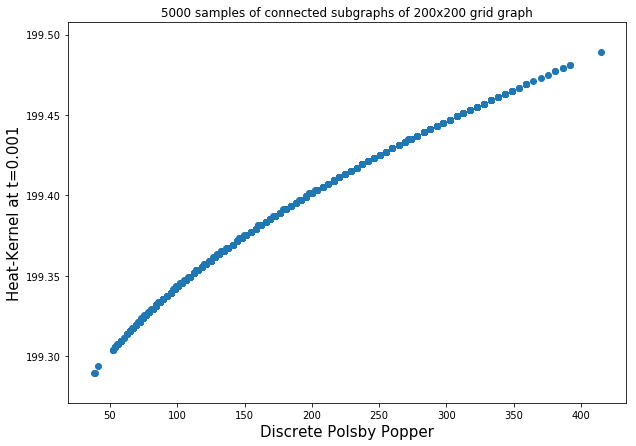

In [5]:
plt.figure(figsize = (10,7))
plt.ylabel("Heat-Kernel at t="+str(t), fontsize = 15)
plt.xlabel("Discrete Polsby Popper", fontsize = 15)
plt.title(str(sample_size) + " samples of connected subgraphs of " +str(n)+"x"+str(n)+" grid graph")
plt.scatter(discrete_pp,heat_kernel)

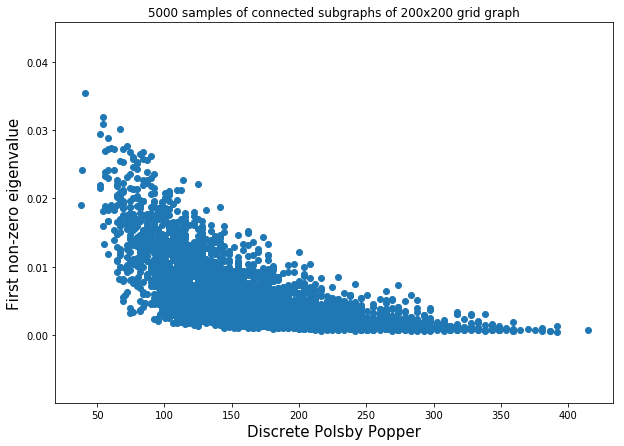

In [6]:
plt.figure(figsize = (10,7))
plt.ylabel("First non-zero eigenvalue", fontsize = 15)
plt.xlabel("Discrete Polsby Popper", fontsize = 15)
plt.title(str(sample_size)+ " samples of connected subgraphs of " +str(n)+"x"+str(n)+" grid graph")
plt.scatter(discrete_pp,first_ev)

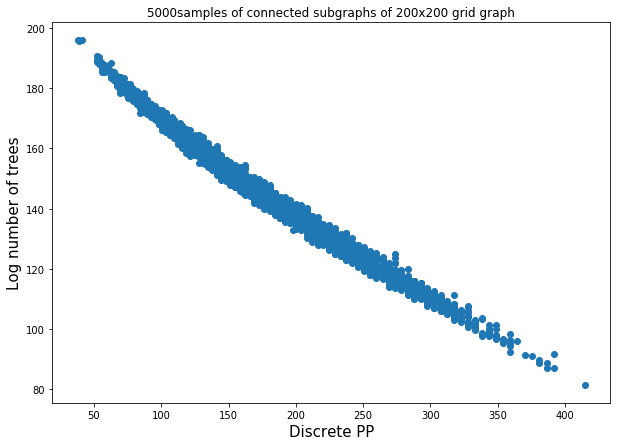

In [7]:
plt.figure(figsize = (10,7))
plt.ylabel("Log number of trees", fontsize = 15)
plt.xlabel("Discrete PP", fontsize = 15)
plt.title( str(sample_size)+"samples of connected subgraphs of " +str(n)+"x"+str(n)+" grid graph")
plt.scatter(discrete_pp, log_tree)

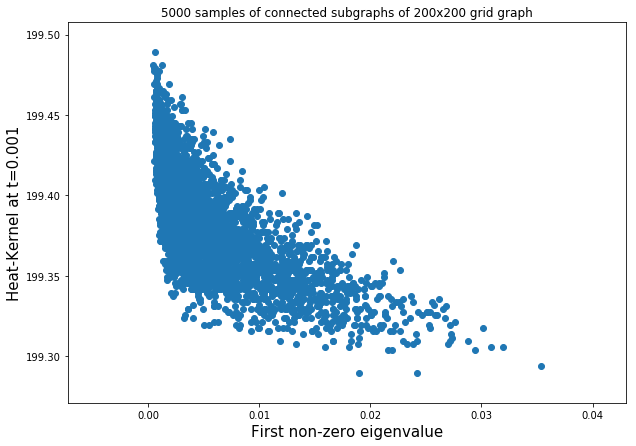

In [8]:
plt.figure(figsize = (10,7))
plt.ylabel("Heat-Kernel at t="+str(t), fontsize = 15)
plt.xlabel("First non-zero eigenvalue", fontsize = 15)
plt.title(str(sample_size) + " samples of connected subgraphs of " +str(n)+"x"+str(n)+" grid graph")
plt.scatter(first_ev, heat_kernel)

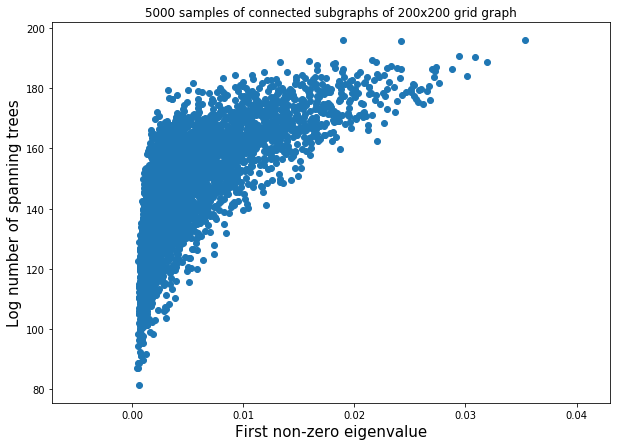

In [9]:
plt.figure(figsize = (10,7))
plt.ylabel("Log number of spanning trees", fontsize = 15)
plt.xlabel("First non-zero eigenvalue", fontsize = 15)
plt.title(str(sample_size) + " samples of connected subgraphs of " +str(n)+"x"+str(n)+" grid graph")
plt.scatter(first_ev, log_tree)

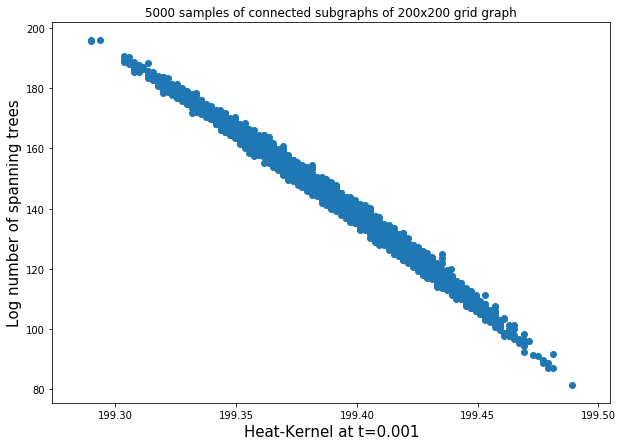

In [10]:
plt.figure(figsize = (10,7))
plt.ylabel("Log number of spanning trees", fontsize = 15)
plt.xlabel("Heat-Kernel at t="+str(t), fontsize = 15)
plt.title(str(sample_size) + " samples of connected subgraphs of " +str(n)+"x"+str(n)+" grid graph")
plt.scatter(heat_kernel, log_tree)

<IPython.core.display.Javascript object>


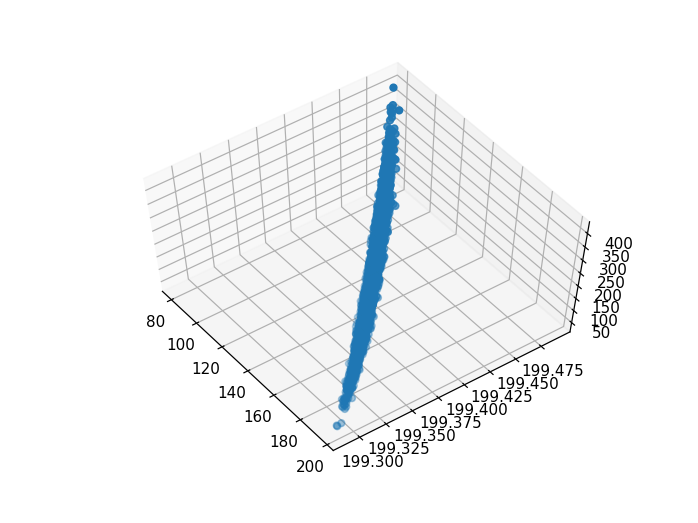

In [15]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(log_tree, heat_kernel, discrete_pp)
